## Twitter Data: Bot or Human?

### Importing libraries we require for learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score
import datetime as dt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

C:\Users\Jayesh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Importing data sources, namely training data and test data using pandas.

In [2]:
#Change location as per files (or check github for data)
training = pd.read_csv("C:/Users/Jayesh/Desktop/ML/data/training_data.csv")
testing = pd.read_csv("C:/Users/Jayesh/Desktop/ML/data/testing_data.csv")

In [3]:
training

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.471604e+07,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LŽV_ EP...,NaN,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,37437,True,56077,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0
1,3.013511e+06,3013511,michellebranch,NaN,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,Fri Mar 30 20:58:59 +0000 2007,1248,True,16688,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0
2,5.623762e+07,56237623,stronginmyfaith,NaN,NaN,NaN,1,7,0,7/13/09 0:38,0,False,3,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0
3,2.796428e+07,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas ___ Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,Tue Mar 31 21:12:33 +0000 2009,143,True,10999,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0
4,5.528761e+08,552876065,resargento,brasil,meio ogra mas o cora_£o © de mocinha,NaN,646,446,2,4/13/12 17:37,13440,False,25292,pt,null,False,False,False,rebosta,0
5,3.810743e+09,3810742695,crazyl1f,NaN,NaN,NaN,2,5,0,Tue Sep 29 04:13:42 +0000 2015,0,False,2,zh-cn,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,0
6,1.531344e+09,1531343556,TaniasimonTania,Milano,"Mechanical engineer, F1 fan and traveler __Ç",NaN,27,25,0,6/19/13 16:46,17,False,50,it,"Status(in_reply_to_user_id=None, lang='en', co...",True,False,False,Tania Simon,0
7,1.289613e+09,1289612510,YCPRProf,‚‰‚£‚_-___ŠŽ-Gamma Iota Advisor,"We are the music makers, and we are the dreame...",https://t.co/0qxQVQhyJq,316,192,9,3/22/13 20:39,2257,False,7329,en,"Status(in_reply_to_user_id=None, lang='en', co...",False,False,True,Dr. K. McBride,0
8,1.998091e+07,19980906,bandofhorses,NaN,'Why Are You OK' out now - https://t.co/G7QeyE...,https://t.co/KcS6ANtb3a,211616,8617,4071,Tue Feb 03 16:21:39 +0000 2009,1941,True,2037,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Band of Horses,0
9,3.782236e+08,378223565,sparker,SF / LA / NYC,"Napster, Plaxo, Facebook, Causes, Spotify & Ai...",https://t.co/OChMaSsvLB,429604,600,4999,Thu Sep 22 21:06:05 +0000 2011,30,True,497,en,{'created_at': 'Wed Feb 01 21:59:23 +0000 2017...,False,False,False,Sean Parker,0


In [4]:
testing

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favorites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.281293e+09,2281292622,__keating,brooklyn,lgbt editor at @buzzfeed. shannon.keating@buzz...,https://t.co/QneJmYRyhj,4466,1295,111,Tue Jan 07 23:26:52 +0000 2014,1579,TRUE,3036,en,{'created_at': 'Tue Apr 11 15:31:51 +0000 2017...,FALSE,FALSE,FALSE,shannon keating,NaN
1,2.344040e+09,2344040251,_callme_Dani,"Los Angeles, CA",News Curation Editor @BuzzFeedNews \rI do a lo...,NaN,295,1016,10,Fri Feb 14 19:45:56 +0000 2014,300,FALSE,618,en,{'created_at': 'Tue Apr 11 00:56:02 +0000 2017...,FALSE,FALSE,FALSE,Danielle Hopkins,NaN
2,7.658713e+08,765871267,_little_britt_,NaN,Family comes first! Also I am in love with piz...,https://t.co/E7DE1cJB7e,1001678,3017,14,8/18/12 15:13,13040,TRUE,3329,en,"{'place': None, 'retweeted': False, 'favorited...",TRUE,FALSE,TRUE,Brittney Smith,NaN
3,4.772373e+09,4772373433,134k5,NaN,@BuzzFeedJapan äÊ @cnet_japan / DM__†Ü‹Ü_Ü...,https://t.co/Cbguzs2PjT,445,487,17,Sun Jan 17 07:11:45 +0000 2016,1112,FALSE,46,ja,{'created_at': 'Sat Apr 08 08:41:08 +0000 2017...,FALSE,FALSE,TRUE,Keigo Isashi,NaN
4,1.324549e+09,None,2181chrom_bot,à»Œö ‹¨Œ_©Œ_¥,‹Ò‹âÎ‹øFE__Ž Õ‹¨‹âø‹Ä_‹ÄÊ‰Û_‹_‹_‹â_ŠÀ¼‹...,http://t.co/10Swf6luED,187,68,13,Wed Apr 03 13:00:42 +0000 2013,None,None,690359,ja,"{u'lang': u'ja', u'text': u'@2181lucina_bot \u...",None,None,None,‹Äã‹â_ŒÈÄ‹âø‹Ä_‹ÄÊbot,NaN
5,2.561342e+09,None,2LA1R_bot,None,‹µ‹âÎ‹â»_‹âÕ‹_‹¦‹âã‹bot‹¤‹ª ‹Ù‹_‹Ç...,None,80,87,None,Wed Jun 11 13:12:06 +0000 2014,None,None,20167,ja,"{u'lang': u'ja', u'text': u'\u3010\u3075\u308c...",TRUE,None,None,‹µ‹âÎ‹â»_bot ver0.2,NaN
6,3.478101e+08,None,3pei_bot,Šüä¾__Œ±Ü,‰ÐÊ‹Á‹â‹Ä_‹ª•_Šüä¾__Œ±Ü‹¤‹Ä_‹ª•_ŠüäŽÄ_‹...,http://twpf.jp/3pei_bot,2020,1978,56,Wed Aug 03 11:52:59 +0000 2011,None,None,968182,ja,"{u'lang': u'ja', u'text': u'@kazenoraby \uff66...",TRUE,None,None,Šüä¾__Œ±ÜŠüäŒ__,NaN
7,8.563039e+08,None,94kichi_bot,None,94 ‹Ä‹Ä£‹ÄÄ‹âø‹ÄÈ‹â_‹â£‹ÄÇ‹â_‹Ä_‹¬¾ãäŒÀÇ‹»Š...,None,70,80,2,Mon Oct 01 12:39:46 +0000 2012,None,None,76735,ja,"{u'lang': u'ja', u'text': u'\u307f\u3093\u306a...",TRUE,None,None,94Œ_«µãbot,NaN
8,8.328750e+17,None,A3_Dekasegi_bot,‹ÄÒ‹Ä_‹Ä_‹ÄäŽ¤ÉŒä,‹âá‹Äö‹Ä_‹Ä_‹ÛÎA3!Œà¼¬_‹_¾Ñ´»Î‹ÄÛ‹Ä¬‹Ä_•_‹...,https://t.co/t171JmIrjL,181,144,2,Sat Feb 18 08:50:03 +0000 2017,None,None,1960,ja,"{u'lang': u'ja', u'text': u'\u30b7\u30c8\u30ed...",TRUE,None,None,A3! Œà¼¬_‹_¾Ñ´»Î,NaN
9,8.885679e+07,None,aamir_khan,Mumbai,Actor.,https://t.co/l1dUhQjS8Y,20419393,9,6,Tue Nov 10 05:08:56 +0000 2009,None,TRUE,468,en,"{u'lang': u'en', u'text': u'Hey guys, doing so...",None,None,None,Aamir Khan,NaN


### Data Cleaning and Formatting

In [5]:
# Training data
training['has_extended_profile'] = training['has_extended_profile'].fillna(False)
training['location']=pd.isnull(training.location).astype(int)
training['listed_count'].replace('None','-1',inplace=True)

# Testing data
testing['location']=pd.isnull(testing.location).astype(int)
testing['followers_count'].replace('None',0,inplace=True)
testing['listed_count'].replace('None','-1',inplace=True)
testing['default_profile_image'] = testing['default_profile_image'].fillna(False)
testing['default_profile_image'].replace('None',False,inplace=True)
testing['friends_count'].replace('None',0,inplace=True)
testing.replace('FALSE',False,inplace=True)
testing.replace('TRUE',True,inplace=True)
testing['favorites_count'].replace('None',0,inplace=True)
testing['statuses_count'].replace('None',0,inplace=True)
testing['has_extended_profile'] = testing['has_extended_profile'].fillna(False)
testing['default_profile'] = testing['default_profile'].fillna(False)
testing['default_profile'].replace('None',False,inplace=True)
testing['verified'].replace('None',False,inplace=True)
testing['verified'] = testing['verified'].fillna(False)
testing['has_extended_profile'] = testing['has_extended_profile'].fillna(False)
testing['has_extended_profile'].replace('None',False,inplace=True)

### Setting required string value as string for processing

In [6]:
testing['name'] = testing['name'].astype(str)
testing['screen_name'] = testing['screen_name'].astype(str)
testing['description'] = testing['description'].astype(str)

### Dealing with null attributes in the above selected column data

In [7]:
training['name'] = training['name'].fillna('No name')
testing['name'] = testing['name'].fillna('No name')  

training['screen_name'] = training['screen_name'].fillna('No screen name')
testing['screen_name'] = testing['screen_name'].fillna('No screen name')  

training['description'] = training['description'].fillna('No description')
testing['description'] = testing['description'].fillna('No description')  

### Checking if 'name' had the word 'bot' in it, thereby helpful in creating a calculated field essential for predicting.

In [8]:
name_bot_train=[]
for row in training.name:
    if ('Bot' in row or 'bot' in row):
        name_bot_train.append(1)
    else:
        name_bot_train.append(0)

name_bot_test=[]
for row in testing.name:
    if ('Bot' in row or 'bot' in row):
        name_bot_test.append(1)
    else:
        name_bot_test.append(0)

### Checking if 'screen_name' had the word 'bot' in it

In [9]:
screen_name_bot_train=[]
for row in training.screen_name:
    if ('Bot' in row or 'bot' in row):
        screen_name_bot_train.append(1)
    else:
        screen_name_bot_train.append(0)

screen_name_bot_test=[]
for row in testing.screen_name:
    if ('Bot' in row or 'bot' in row):
        screen_name_bot_test.append(1)
    else:
        screen_name_bot_test.append(0)

### Checking if 'description' had the word 'bot' in it

In [10]:
description_bot_train=[]
for row in training.description:
    if ('Bot' in row or 'bot' in row):
        description_bot_train.append(1)
    else:
        description_bot_train.append(0)

description_bot_test=[]
for row in testing.description:
    if ('Bot' in row or 'bot' in row):
        description_bot_test.append(1)
    else:
        description_bot_test.append(0)

### Compiling above three lists to be if any one has 'bot' present (Training Data)

In [11]:
for i in range(0, len(name_bot_train)):
    if(name_bot_train[i]==1 or screen_name_bot_train[i]==1 or description_bot_train[i]==1):
        name_bot_train[i]=1

### Compiling above three lists to be if any one has 'bot' present (Testing Data)

In [12]:
for i in range(0, len(name_bot_test)):
    if(name_bot_test[i]==1 or screen_name_bot_test[i]==1 or description_bot_test[i]==1):
        name_bot_test[i]=1

### Combining calculated field with data

In [13]:
training['name_bot']=name_bot_train
testing['name_bot']=name_bot_test

### Calculating date since creation

In [14]:
training['created_at'] = pd.to_datetime(training['created_at'], errors='coerce')
training['created_at']=2017-training['created_at'].dt.year

testing['created_at'] = pd.to_datetime(testing['created_at'], errors='coerce')
testing['created_at']=2017-testing['created_at'].dt.year

training['created_at'].replace('None',0,inplace=True)
training['created_at'].replace('NaN',0,inplace=True)
testing['created_at'].replace('None',0,inplace=True)
testing['created_at'].replace('NaN',0,inplace=True)

In [15]:
training

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot,name_bot
0,3.471604e+07,34716038,aaroncarter,0,NEW AARON CARTER MUSIC DOWNLOAD LINK LŽV_ EP...,NaN,571310,76070,4909,8.0,...,True,56077,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0,0
1,3.013511e+06,3013511,michellebranch,1,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,10.0,...,True,16688,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0,0
2,5.623762e+07,56237623,stronginmyfaith,1,No description,NaN,1,7,0,8.0,...,False,3,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0,0
3,2.796428e+07,27964284,Jessicaveronica,0,"@TheVeronicas ___ Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,8.0,...,True,10999,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0,0
4,5.528761e+08,552876065,resargento,0,meio ogra mas o cora_£o © de mocinha,NaN,646,446,2,5.0,...,False,25292,pt,null,False,False,False,rebosta,0,0
5,3.810743e+09,3810742695,crazyl1f,1,No description,NaN,2,5,0,2.0,...,False,2,zh-cn,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,0,0
6,1.531344e+09,1531343556,TaniasimonTania,0,"Mechanical engineer, F1 fan and traveler __Ç",NaN,27,25,0,4.0,...,False,50,it,"Status(in_reply_to_user_id=None, lang='en', co...",True,False,False,Tania Simon,0,0
7,1.289613e+09,1289612510,YCPRProf,0,"We are the music makers, and we are the dreame...",https://t.co/0qxQVQhyJq,316,192,9,4.0,...,False,7329,en,"Status(in_reply_to_user_id=None, lang='en', co...",False,False,True,Dr. K. McBride,0,0
8,1.998091e+07,19980906,bandofhorses,1,'Why Are You OK' out now - https://t.co/G7QeyE...,https://t.co/KcS6ANtb3a,211616,8617,4071,8.0,...,True,2037,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Band of Horses,0,0
9,3.782236e+08,378223565,sparker,0,"Napster, Plaxo, Facebook, Causes, Spotify & Ai...",https://t.co/OChMaSsvLB,429604,600,4999,6.0,...,True,497,en,{'created_at': 'Wed Feb 01 21:59:23 +0000 2017...,False,False,False,Sean Parker,0,0


In [16]:
testing

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot,name_bot
0,2.281293e+09,2281292622,__keating,0,lgbt editor at @buzzfeed. shannon.keating@buzz...,https://t.co/QneJmYRyhj,4466,1295,111,3,...,True,3036,en,{'created_at': 'Tue Apr 11 15:31:51 +0000 2017...,False,False,False,shannon keating,NaN,0
1,2.344040e+09,2344040251,_callme_Dani,0,News Curation Editor @BuzzFeedNews \rI do a lo...,NaN,295,1016,10,3,...,False,618,en,{'created_at': 'Tue Apr 11 00:56:02 +0000 2017...,False,False,False,Danielle Hopkins,NaN,0
2,7.658713e+08,765871267,_little_britt_,1,Family comes first! Also I am in love with piz...,https://t.co/E7DE1cJB7e,1001678,3017,14,5,...,True,3329,en,"{'place': None, 'retweeted': False, 'favorited...",True,False,True,Brittney Smith,NaN,0
3,4.772373e+09,4772373433,134k5,1,@BuzzFeedJapan äÊ @cnet_japan / DM__†Ü‹Ü_Ü...,https://t.co/Cbguzs2PjT,445,487,17,1,...,False,46,ja,{'created_at': 'Sat Apr 08 08:41:08 +0000 2017...,False,False,True,Keigo Isashi,NaN,0
4,1.324549e+09,None,2181chrom_bot,0,‹Ò‹âÎ‹øFE__Ž Õ‹¨‹âø‹Ä_‹ÄÊ‰Û_‹_‹_‹â_ŠÀ¼‹...,http://t.co/10Swf6luED,187,68,13,4,...,False,690359,ja,"{u'lang': u'ja', u'text': u'@2181lucina_bot \u...",False,False,False,‹Äã‹â_ŒÈÄ‹âø‹Ä_‹ÄÊbot,NaN,1
5,2.561342e+09,None,2LA1R_bot,0,‹µ‹âÎ‹â»_‹âÕ‹_‹¦‹âã‹bot‹¤‹ª ‹Ù‹_‹Ç...,None,80,87,-1,3,...,False,20167,ja,"{u'lang': u'ja', u'text': u'\u3010\u3075\u308c...",True,False,False,‹µ‹âÎ‹â»_bot ver0.2,NaN,1
6,3.478101e+08,None,3pei_bot,0,‰ÐÊ‹Á‹â‹Ä_‹ª•_Šüä¾__Œ±Ü‹¤‹Ä_‹ª•_ŠüäŽÄ_‹...,http://twpf.jp/3pei_bot,2020,1978,56,6,...,False,968182,ja,"{u'lang': u'ja', u'text': u'@kazenoraby \uff66...",True,False,False,Šüä¾__Œ±ÜŠüäŒ__,NaN,1
7,8.563039e+08,None,94kichi_bot,0,94 ‹Ä‹Ä£‹ÄÄ‹âø‹ÄÈ‹â_‹â£‹ÄÇ‹â_‹Ä_‹¬¾ãäŒÀÇ‹»Š...,None,70,80,2,5,...,False,76735,ja,"{u'lang': u'ja', u'text': u'\u307f\u3093\u306a...",True,False,False,94Œ_«µãbot,NaN,1
8,8.328750e+17,None,A3_Dekasegi_bot,0,‹âá‹Äö‹Ä_‹Ä_‹ÛÎA3!Œà¼¬_‹_¾Ñ´»Î‹ÄÛ‹Ä¬‹Ä_•_‹...,https://t.co/t171JmIrjL,181,144,2,0,...,False,1960,ja,"{u'lang': u'ja', u'text': u'\u30b7\u30c8\u30ed...",True,False,False,A3! Œà¼¬_‹_¾Ñ´»Î,NaN,1
9,8.885679e+07,None,aamir_khan,0,Actor.,https://t.co/l1dUhQjS8Y,20419393,9,6,8,...,True,468,en,"{u'lang': u'en', u'text': u'Hey guys, doing so...",False,False,False,Aamir Khan,NaN,0


### Setting data as Training, and Testing to be used in algorithms

In [17]:
X = training[['created_at','followers_count','friends_count','favourites_count','statuses_count','verified','default_profile','default_profile_image','has_extended_profile','location','name_bot']].astype(int)
Y = training.bot

Xtest = testing[['created_at','followers_count','friends_count','favorites_count','statuses_count','verified','default_profile','default_profile_image','has_extended_profile','location','name_bot']].astype(int)

### Defining classifers, making predictions, and calculating performance metrics 

#### a. Random Forest

In [18]:
RandomForestClassifier()
clfr = RandomForestClassifier()
clfr.fit(X, Y)
rpredict = clfr.predict(Xtest)
rpredict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1,

In [19]:
accuracy = cross_val_score(clfr, X, Y, cv=5, scoring='accuracy')
print "Accuracy: ",accuracy.mean()
precision = cross_val_score(clfr, X, Y, cv=5, scoring='precision')
print "Precision: ",precision.mean() 
recall = cross_val_score(clfr, X, Y, cv=5, scoring='recall')
print "Recall: ",recall.mean()
f1 = cross_val_score(clfr, X, Y, cv=5, scoring='f1')
print "F1: ",f1.mean()
auc = cross_val_score(clfr, X, Y, cv=5, scoring='roc_auc')
print "AUC: ",auc.mean()

Accuracy:  0.981498465962
Precision:  0.990473291206
Recall:  0.977271118974
F1:  0.984250442339
AUC:  0.996744056483


#### b. AdaBoost

In [20]:
AdaBoostClassifier()
clfa = AdaBoostClassifier()
clfa.fit(X, Y)
apredict = clfa.predict(Xtest)
apredict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1,

In [21]:
accuracy = cross_val_score(clfa, X, Y, cv=5, scoring='accuracy')
print "Accuracy: ",accuracy.mean()
precision = cross_val_score(clfa, X, Y, cv=5, scoring='precision')
print "Precision: ",precision.mean() 
recall = cross_val_score(clfa, X, Y, cv=5, scoring='recall')
print "Recall: ",recall.mean()
f1 = cross_val_score(clfa, X, Y, cv=5, scoring='f1')
print "F1: ",f1.mean()
auc = cross_val_score(clfa, X, Y, cv=5, scoring='roc_auc')
print "AUC: ",auc.mean()

Accuracy:  0.903960831394
Precision:  0.895190116399
Recall:  0.902821760283
F1:  0.898866882732
AUC:  0.967054758311


#### c. KNeighbors Classifier

In [22]:
KNeighborsClassifier(5)
clfk = KNeighborsClassifier()
clfk.fit(X, Y)
kpredict = clfk.predict(Xtest)
kpredict

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1,

In [23]:
accuracy = cross_val_score(clfk, X, Y, cv=5, scoring='accuracy')
print "Accuracy: ",accuracy.mean()
precision = cross_val_score(clfk, X, Y, cv=5, scoring='precision')
print "Precision: ",precision.mean() 
recall = cross_val_score(clfk, X, Y, cv=5, scoring='recall')
print "Recall: ",recall.mean()
f1 = cross_val_score(clfk, X, Y, cv=5, scoring='f1')
print "F1: ",f1.mean()
auc = cross_val_score(clfk, X, Y, cv=5, scoring='roc_auc')
print "AUC: ",auc.mean()

Accuracy:  0.873138379601
Precision:  0.85551584092
Recall:  0.880529854047
F1:  0.867734080373
AUC:  0.950293332971


#### d. Gradient Boost

In [24]:
GradientBoostingClassifier()
clfg = GradientBoostingClassifier()
clfg.fit(X, Y)
gpredict = clfg.predict(Xtest)
gpredict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1,

In [25]:
accuracy = cross_val_score(clfg, X, Y, cv=5, scoring='accuracy')
print "Accuracy: ",accuracy.mean()
precision = cross_val_score(clfg, X, Y, cv=5, scoring='precision')
print "Precision: ",precision.mean() 
recall = cross_val_score(clfg, X, Y, cv=5, scoring='recall')
print "Recall: ",recall.mean()
f1 = cross_val_score(clfg, X, Y, cv=5, scoring='f1')
print "F1: ",f1.mean()
auc = cross_val_score(clfg, X, Y, cv=5, scoring='roc_auc')
print "AUC: ",auc.mean()

Accuracy:  0.936767799533
Precision:  0.934295182991
Recall:  0.931847854931
F1:  0.933036528098
AUC:  0.983247223419


#### Comparison of the above estimators:

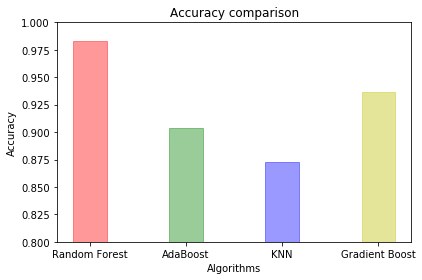

In [26]:
n_groups = 4
index = np.arange(n_groups)
bar_width = 0.35

means_men = (0.9834,0.9039,0.8731,0.9367)
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, means_men, bar_width, alpha=opacity, error_kw=error_config)

rects1[0].set_color('r')
rects1[1].set_color('g')
rects1[2].set_color('b')
rects1[3].set_color('y')

axes= plt.gca()
axes.set_ylim([0.8,1.0])

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison')
plt.xticks(index, ('Random Forest', 'AdaBoost', 'KNN', 'Gradient Boost'))
plt.tight_layout()
plt.show()

#### Precision vs Recall graph

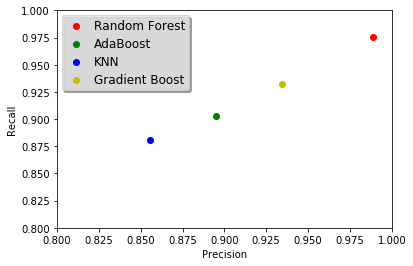

In [27]:
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(0.98869, 0.97558, 'ro',label='Random Forest')
plt.plot(0.89519, 0.90282, 'go',label='AdaBoost')
plt.plot(0.85551, 0.88052, 'bo',label='KNN')
plt.plot(0.93429, 0.93184, 'yo',label='Gradient Boost')

plt.axis([0.80, 1.0, 0.80, 1.00])

legend = plt.legend(loc='upper left', shadow=True)

frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')

plt.show()

#### Finding best estimator

In [28]:
rfc = RandomForestClassifier(n_jobs=-1,max_features='sqrt',n_estimators=10, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 2000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc,scoring='accuracy',param_grid=param_grid, cv=5)
CV_rfc.fit(X,Y)
print '\n',CV_rfc.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)


In [29]:
clfr1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)
clfr1.fit(X, Y)
rpredict1 = clfr1.predict(Xtest)
rpredict1

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1,

In [30]:
accuracy = cross_val_score(clfr1, X, Y, cv=5, scoring='accuracy')
print "Accuracy: ",accuracy.mean()
precision = cross_val_score(clfr1, X, Y, cv=5, scoring='precision')
print "Precision: ",precision.mean() 
recall = cross_val_score(clfr1, X, Y, cv=5, scoring='recall')
print "Recall: ",recall.mean()
f1 = cross_val_score(clfr1, X, Y, cv=5, scoring='f1')
print "F1: ",f1.mean()
auc = cross_val_score(clfr1, X, Y, cv=5, scoring='roc_auc')
print "AUC: ",auc.mean()

Accuracy:  0.990249546705
Precision:  0.990234283037
Recall:  0.989053516143
F1:  0.989228953106
AUC:  0.998251058511


In [31]:
result = testing.ix[0:574,:]
id1 = result.id
ids = id1.astype(np.int64)
output = pd.DataFrame(data={"Id":ids, "bot":rpredict1,})
column = list(output)
output.columns = column
output.ix[:,column]

,Id,bot
0,2281292622,0
1,2344040251,0
2,765871267,0
3,4772373433,0
4,1324548560,1
5,2561341789,1
6,347810134,1
7,856303860,1
8,832875000000000000,1
9,88856792,0


In [32]:
output.to_csv("C:/Users/Jayesh/Desktop/ML/data/kaggle.csv", index=False) #Change location as per file